In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import IPython
from typing import List, Tuple, Dict, Any
import textalloc as ta
import logging

notebook_path = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"])
project_dir = notebook_path.parent.parent
sys.path.append(str(project_dir))
import src.utils.custom_log as custom_log
from src.utils.set_rcparams import set_rcparams

os.chdir(project_dir)
LOG = logging.getLogger(__name__)

custom_log.init_logger(logging.INFO)
READ_NEW = False
LOG.info("Log initialized - Read New %s", READ_NEW)

set_rcparams()

2024-12-05 09:49:27,988     INFO  MainProcess  MainThread Log initialized - Read New False
2024-12-05 09:49:27,990     INFO  MainProcess  MainThread Setting rcparams for matplotlib
2024-12-05 09:49:28,035     INFO  MainProcess  MainThread Using style src/visualization/dissertation.mplstyle


In [7]:
NAMES: List[str] = [
    "HIII 50M",
    "HIII 05F",
    "HIII 95M",
    "THOR 50M",
    "THUMS 50M",
    "THUMS 05F",
    "THUMS 95M",
    "VIVA+ 50F",
    "SAFER HBM 50M",
    "VIRTHUMAN 50M",
    "GHBMC 50M",
    "THOR 05F",
    "North America 1970 05F",
    "North America 1970 50F",
    "North America 1970 50M",
    "North America 1970 95M",
    "North America 2000 05F",
    "North America 2000 50F",
    "North America 2000 50M",
    "North America 2000 95M",
    "Malaysia 05F",
    "Malaysia 50F",
    "Malaysia 50M",
    "Malaysia 95M",
]

PERCENTILES: List[str] = [x.split()[-1] for x in NAMES]

TPS: List[str] = ["ATD", "HBM", "Population"]
TYPES: List[str] = [
    TPS[0],
    TPS[0],
    TPS[0],
    TPS[0],
    TPS[1],
    TPS[1],
    TPS[1],
    TPS[1],
    TPS[1],
    TPS[1],
    TPS[1],
    TPS[0],
    TPS[2],
    TPS[2],
    TPS[2],
    TPS[2],
    TPS[2],
    TPS[2],
    TPS[2],
    TPS[2],
    TPS[2],
    TPS[2],
    TPS[2],
    TPS[2],
]

STANDING_HEIGHTS_CM: List[float] = [
    172,
    147,
    184,
    175,
    179.00,
    153.00,
    188.00,
    162.00,
    178.00,
    180.00,
    175.30,
    151.00,
    151.1,
    161.8,
    175.3,
    186.9,
    150.8,
    162.2,
    176.1,
    188.7,
    146.4,
    155.1,
    168.5,
    179.3,
]

WEIGHTS_KG: List[float] = [
    77.3,
    49.00,
    101.2,
    76.6,
    79.00,
    49.00,
    106.00,
    60.00,
    78.00,
    77.00,
    77.10,
    47.30,
    47,
    62.3,
    77,
    102.3,
    50.3,
    71,
    85.4,
    123.4,
    42.7,
    55.8,
    66,
    94.8,
]

SOURCES: List[str] = [
    ["measured from LSTC model"],
    ["measured from LSTC model"],
    ["measured from LSTC model"],
    [
        "https://www.nhtsa.gov/sites/nhtsa.gov/files/2022-12/Report-to-Congress-Interim-Report-to-Congress-on-Crash-Test-Dummies_FINAL-tag_0.pdf"
    ],
    ["https://www.ircobi.org/wordpress/downloads/irc18/pdf-files/32.pdf"],
    [
        "https://www.ircobi.org/wordpress/downloads/irc18/pdf-files/32.pdf",
    ],
    [
        "https://www.ircobi.org/wordpress/downloads/irc18/pdf-files/32.pdf",
    ],
    ["https://doi.org/10.3389/fbioe.2023.1169365"],
    ["https://doi.org/10.3389/fbioe.2023.1169365"],
    ["Kovar.2019"],
    ["https://www.ircobi.org/wordpress/downloads/irc13/pdf_files/41.pdf"],
    [
        "https://www.nhtsa.gov/sites/nhtsa.gov/files/2022-12/Report-to-Congress-Interim-Report-to-Congress-on-Crash-Test-Dummies_FINAL-tag_0.pdf"
    ],
]

STR_NAMES, STR_TYPE, STR_HEIGHT, STR_WEIGHT, STR_PERC = "Name", "Type", "Standing Height (cm)", "Weight (kg)", "Percentile"
DB = pd.DataFrame(
    {STR_NAMES: NAMES, STR_TYPE: TYPES, STR_HEIGHT: STANDING_HEIGHTS_CM, STR_WEIGHT: WEIGHTS_KG, STR_PERC: PERCENTILES}
)
DB

,Name,Type,Standing Height (cm),Weight (kg),Percentile
0,HIII 50M,ATD,172.0,77.3,50M
1,HIII 05F,ATD,147.0,49.0,05F
2,HIII 95M,ATD,184.0,101.2,95M
3,THOR 50M,ATD,175.0,76.6,50M
4,THUMS 50M,HBM,179.0,79.0,50M
5,THUMS 05F,HBM,153.0,49.0,05F
6,THUMS 95M,HBM,188.0,106.0,95M
7,VIVA+ 50F,HBM,162.0,60.0,50F
8,SAFER HBM 50M,HBM,178.0,78.0,50M
9,VIRTHUMAN 50M,HBM,180.0,77.0,50M


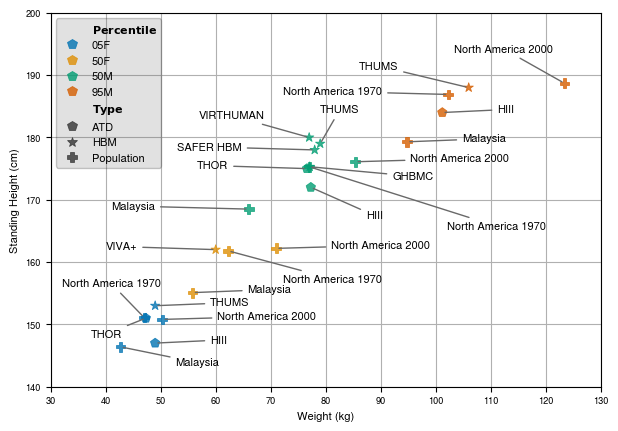

2024-12-05 10:11:52,997     INFO  MainProcess  MainThread maxp pruned
2024-12-05 10:11:53,026     INFO  MainProcess  MainThread cmap pruned
2024-12-05 10:11:53,035     INFO  MainProcess  MainThread kern dropped
2024-12-05 10:11:53,036     INFO  MainProcess  MainThread post pruned
2024-12-05 10:11:53,040     INFO  MainProcess  MainThread FFTM dropped
2024-12-05 10:11:53,059     INFO  MainProcess  MainThread GPOS pruned
2024-12-05 10:11:53,068     INFO  MainProcess  MainThread GSUB pruned
2024-12-05 10:11:53,094     INFO  MainProcess  MainThread glyf pruned
2024-12-05 10:11:53,097     INFO  MainProcess  MainThread Added gid0 to subset
2024-12-05 10:11:53,098     INFO  MainProcess  MainThread Added first four glyphs to subset
2024-12-05 10:11:53,099     INFO  MainProcess  MainThread Closing glyph list over 'GSUB': 15 glyphs before
2024-12-05 10:11:53,101     INFO  MainProcess  MainThread Glyph names: ['.notdef', '.null', 'P', 'T', 'c', 'e', 'i', 'l', 'n', 'nonmarkingreturn', 'p', 'r', 'sp

In [8]:
fig_width: float = 1 * (448.13095 / 72)
fig_height: float = 0.7 * fig_width
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

ax.set_ylim([140, 200])
ax.set_xlim([30, 130])
ax.set_xticks(np.arange(30, 131, 10))
ax.set_yticks(np.arange(140, 201, 10))

anno = lambda j, dx, dy: ax.annotate(
    xy=(WEIGHTS_KG[j], STANDING_HEIGHTS_CM[j]),
    text=" ".join(NAMES[j].split()[:-1]),
    xytext=(WEIGHTS_KG[j] + dx, STANDING_HEIGHTS_CM[j] + dy),
    arrowprops=dict(arrowstyle="-", edgecolor="dimgray"),
)
anno(j=0, dx=10, dy=-5)
anno(j=1, dx=10, dy=0)
anno(j=2, dx=10, dy=0)
anno(j=3, dx=-20, dy=0)
anno(j=4, dx=0, dy=5)
anno(j=5, dx=10, dy=0)
anno(j=6, dx=-20, dy=3)
anno(j=7, dx=-20, dy=0)
anno(j=8, dx=-25, dy=0)
anno(j=9, dx=-20, dy=3)
anno(j=10, dx=15, dy=-2)
anno(j=11, dx=-10, dy=-3)
anno(j=12, dx=-15, dy=5)
anno(j=13, dx=10, dy=-5)
anno(j=14, dx=25, dy=-10)
anno(j=15, dx=-30, dy=0)
anno(j=16, dx=10, dy=0)
anno(j=17, dx=10, dy=0)
anno(j=18, dx=10, dy=0)
anno(j=19, dx=-20, dy=5)
anno(j=20, dx=10, dy=-3)
anno(j=21, dx=10, dy=0)
anno(j=22, dx=-25, dy=0)
anno(j=23, dx=10, dy=0)

ax.grid()
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Standing Height (cm)")
sns.scatterplot(
    data=DB,
    x=STR_WEIGHT,
    y=STR_HEIGHT,
    style=STR_TYPE,
    hue=STR_PERC,
    ax=ax,
    s=50,
    hue_order=["05F", "50F", "50M", "95M"],
    style_order=TPS,
    palette="colorblind",
    markers=["p", "*", "P"],
    edgecolors="face",
    alpha=0.8,
)

h, l = ax.get_legend_handles_labels()
l[0] = r"$\bf{" + l[0] + "}$"
l[5] = r"$\bf{" + l[5] + "}$"
ax.legend(h, l, facecolor="dimgray", framealpha=0.2, edgecolor="black", frameon=True)
ax.set_axisbelow(True)
plt.show()
fig.savefig(Path("reports") / "figures" / "surrogate_weights_vs_heights.pdf")